## Importing required Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv("data/train_data.csv")
valid_data = pd.read_csv("data/valid_data.csv")

In [3]:
print(train_data.shape)
train_data.head()

(578, 2)


,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


In [4]:
print(valid_data.shape)
valid_data.head()

(184, 2)


,Date,count
0,2014-03-26,198
1,2014-03-27,120
2,2014-03-28,207
3,2014-03-29,145
4,2014-03-30,130


# Required Preprocessing 

In [5]:
train_data.timestamp = pd.to_datetime(train_data['Date'],format='%Y-%m-%d')
train_data.index = train_data.timestamp

In [6]:
valid_data.timestamp = pd.to_datetime(valid_data['Date'],format='%Y-%m-%d')
valid_data.index = valid_data.timestamp

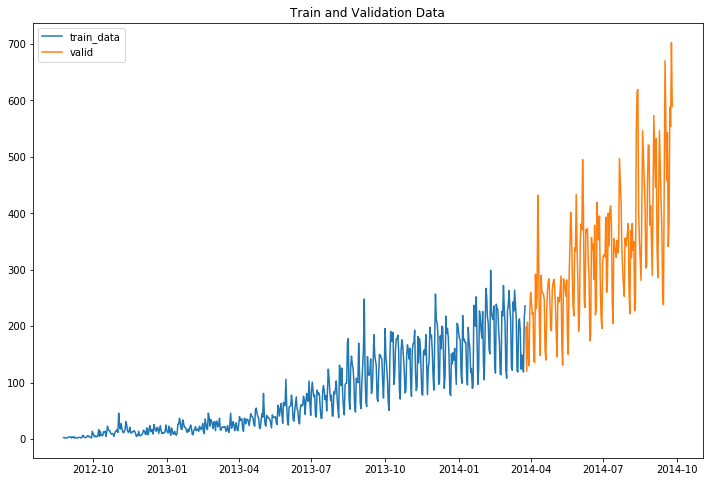

In [7]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.show()

# Simple Average

Taking average of the complete data

In [8]:
train_data['count'].mean()

78.18166089965398

In [9]:
# Defining predictions for validation
valid_data['average_complete'] = train_data['count'].mean()

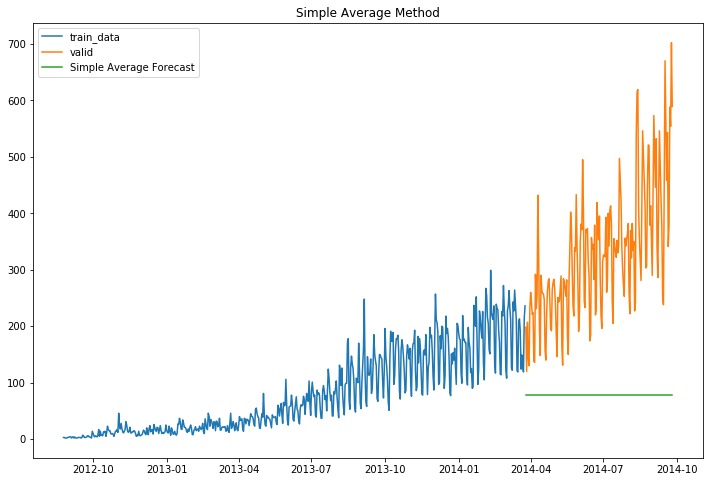

In [10]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_complete'], label='Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [11]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_complete']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 274.7203499275037


The initial values in the train data are smaller. Instead of taking the average of the complete data, we should take the average of only the recent values in order to make the predictions. 

In [12]:
train_data.tail(7)

,Date,count
Date,,
2014-03-19,2014-03-19,192
2014-03-20,2014-03-20,124
2014-03-21,2014-03-21,149
2014-03-22,2014-03-22,129
2014-03-23,2014-03-23,119
2014-03-24,2014-03-24,214
2014-03-25,2014-03-25,236


In [13]:
temp = (train_data['count'][571:578]).values
print('Lask week values are:', temp)
print('Average for last week is', temp.mean())

Lask week values are: [192 124 149 129 119 214 236]
Average for last week is 166.14285714285714


In [14]:
# Defining predictions for validation
valid_data['average_lastweek'] = temp.mean()

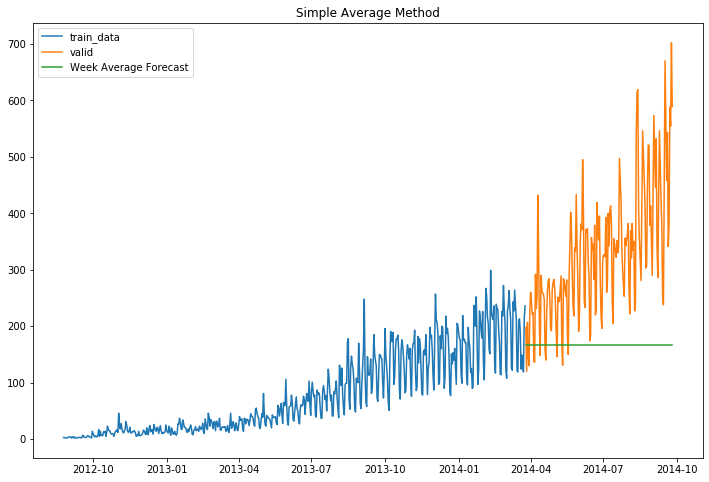

In [15]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['count'], label='train_data')
plt.plot(valid_data.index,valid_data['count'], label='valid')
plt.plot(valid_data.index,valid_data['average_lastweek'], label='Week Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Method")
plt.show()

In [16]:
# calculating RMSE 
rmse = sqrt(mean_squared_error(valid_data['count'], valid_data['average_lastweek']))
print('The RMSE value for Simple Approach is', rmse)

The RMSE value for Simple Approach is 198.23734967376558


This is better than the last method. Here, instead of 7 days, you can take last 14 days, or 20 days and see which gives you more accurate results. Try it out at your end.